**Introdução a modelos de classificação de dados em Machine Learning**
 
Você sabe como funciona um modelo supervisionado de classificação em machine learning? Na aula de hoje vamos aprender a como criar um classificador automático e inteligente utilizando ferramentas de machine learning. Vamos lá? 😀

**Case: Classificação de insetos gafanhotos e esperanças**

Um certo cientista coletou dados de amostra sobre uma população de insetos da espécie gafanhoto e esperança para realizar um estudo e identificar uma forma de encontrar diferenças entre os tipos de insetos analisando algumas das características presentes no corpo dos insetos.

Com base em suas pesquisas e análises, o cientista identificou que as características do tamanho do abdomên e comprimento das antenas desses insetos podem ser um fator muito relevante para a identificação da espécie.

O cientista precisa encontrar uma maneira de identificar de forma **automática e precisa** os padrões dessas características que podem classificar quando um inseto é do tipo gafanhoto ou do tipo esperança.

Vamos aplicar machine learning para resolver esse problema?


In [2]:
import pandas as pd

In [52]:
dados = pd.read_excel('gaf_esp.xlsx')

In [4]:
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [5]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [6]:
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

**Como funciona o modelo de classificação?**

Vamos observar os dados com o gráfico de dispersão:

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

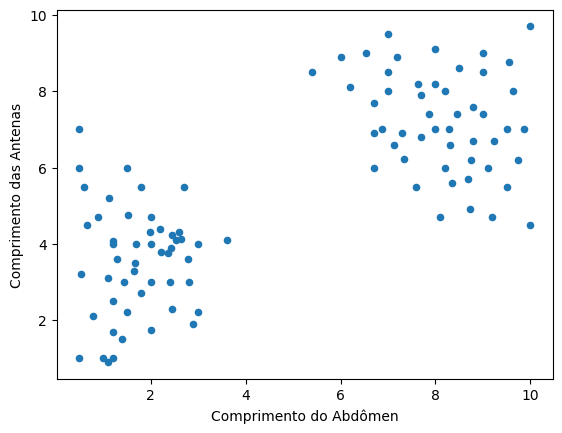

In [7]:
dados.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

In [8]:
#pip install -U scikit-learn
from sklearn.model_selection import train_test_split

In [9]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]
y = dados['Espécie']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=42)

In [11]:
list(y_train).count('Gafanhoto')

40

In [12]:
list(y_train).count('Esperança')

40

In [13]:
print("Total base de treino: ", len(x_train))
print("Total base de teste: ", len(y_test))


Total base de treino:  80
Total base de teste:  20


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Comprimento AB: 8
# Comprimento AT: 6
modelo_classificador.predict([[8,6]])

c:\Users\Will\OneDrive\Documentos\dev\dados\fiap_data_analytics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_predito = modelo_classificador.predict(x_test)

In [19]:
accuracy_score(y_true = y_test, y_pred=y_predito)

1.0

<Axes: >

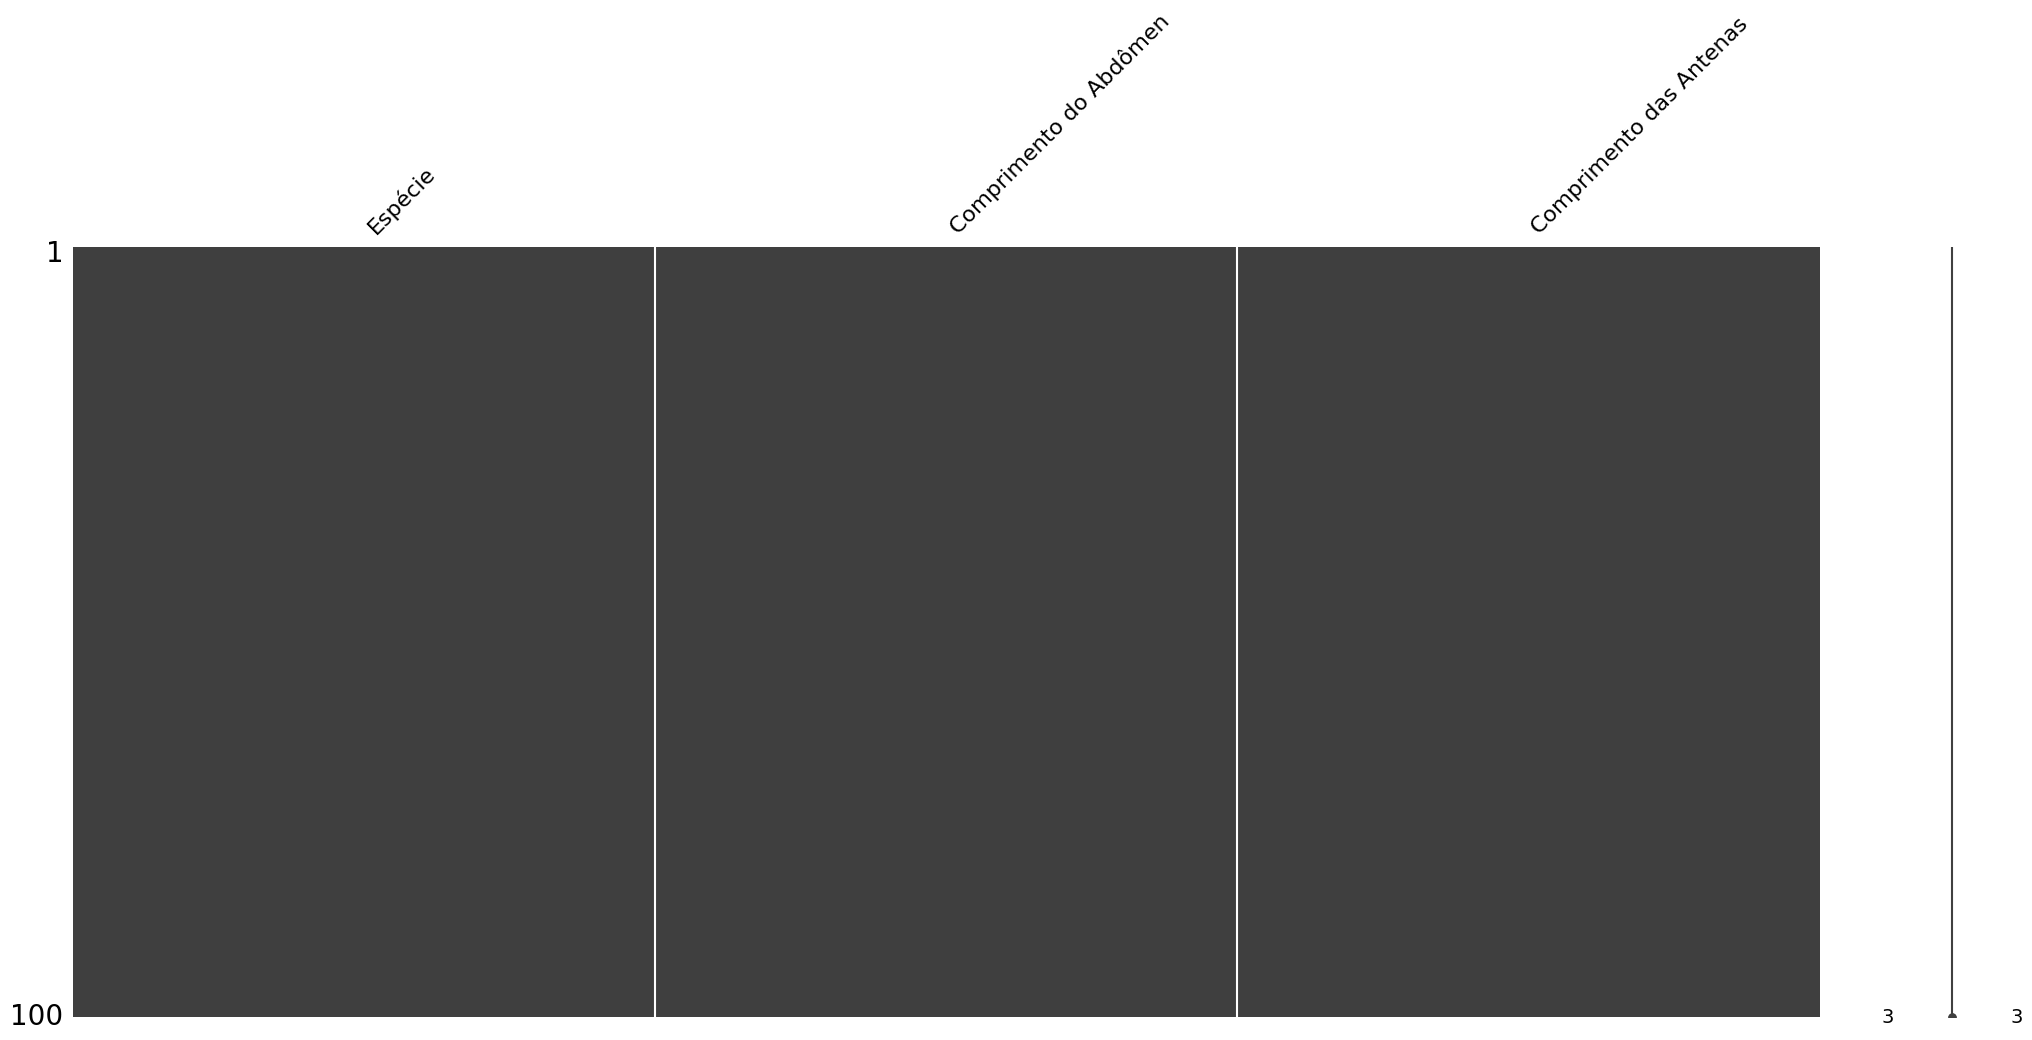

In [20]:
import missingno as msno

msno.matrix(dados)

In [24]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [25]:
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [26]:
item0Normalizado = (7 - 5.38)/ 2.29

print(item0Normalizado)

0.7074235807860262


In [59]:
def StdScalerManual(x):
    
    u = dados['Comprimento das Antenas'].mean()
    
    s = dados['Comprimento das Antenas'].std()

    print (f'{x} - {u} / {s}')  

    return (x -u) / s

In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Espécie                  100 non-null    object 
 1   Comprimento do Abdômen   100 non-null    float64
 2   Comprimento das Antenas  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [60]:
new_df = dados[['Comprimento do Abdômen','Comprimento das Antenas']]
new_df['Comprimento das Antenas'] = new_df['Comprimento das Antenas'].apply(StdScalerManual)

new_df.head()

7.0 - 5.382400000000001 / 2.2960005279272964
6.0 - 5.382400000000001 / 2.2960005279272964
5.5 - 5.382400000000001 / 2.2960005279272964
4.5 - 5.382400000000001 / 2.2960005279272964
3.2 - 5.382400000000001 / 2.2960005279272964
2.2 - 5.382400000000001 / 2.2960005279272964
1.75 - 5.382400000000001 / 2.2960005279272964
1.0 - 5.382400000000001 / 2.2960005279272964
0.89 - 5.382400000000001 / 2.2960005279272964
1.0 - 5.382400000000001 / 2.2960005279272964
1.5 - 5.382400000000001 / 2.2960005279272964
5.5 - 5.382400000000001 / 2.2960005279272964
1.0 - 5.382400000000001 / 2.2960005279272964
4.7 - 5.382400000000001 / 2.2960005279272964
3.1 - 5.382400000000001 / 2.2960005279272964
1.9 - 5.382400000000001 / 2.2960005279272964
4.0 - 5.382400000000001 / 2.2960005279272964
4.76 - 5.382400000000001 / 2.2960005279272964
2.5 - 5.382400000000001 / 2.2960005279272964
4.7 - 5.382400000000001 / 2.2960005279272964
3.0 - 5.382400000000001 / 2.2960005279272964
4.0 - 5.382400000000001 / 2.2960005279272964
4.1 - 5

C:\Users\Will\AppData\Local\Temp\ipykernel_9100\773761298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Comprimento das Antenas'] = new_df['Comprimento das Antenas'].apply(StdScalerManual)


,Comprimento do Abdômen,Comprimento das Antenas
0,0.50,0.704529
1,0.50,0.268989
2,0.60,0.051220
3,0.65,-0.384320
4,0.54,-0.950522


In [34]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
novo_dados = dados.drop(columns='Espécie')
scaler.fit(novo_dados)

result = scaler.transform(novo_dados)
result

array([[-1.33337534,  0.70807874],
       [-1.33337534,  0.2703446 ],
       [-1.30331864,  0.05147753],
       [-1.28829029, -0.3862566 ],
       [-1.32135266, -0.95531099],
       [-0.58195783, -1.39304513],
       [-0.88252484, -1.59002549],
       [-1.18309184, -1.91832609],
       [-1.15303514, -1.96647685],
       [-1.12297844, -1.91832609],
       [-1.06286504, -1.69945902],
       [-0.67212794,  0.05147753],
       [-1.33337534, -1.91832609],
       [-1.21314854, -0.29870978],
       [-1.15303514, -0.9990844 ],
       [-0.61201453, -1.52436537],
       [-0.88252484, -0.60512367],
       [-1.026797  , -0.27244573],
       [-1.12297844, -1.26172488],
       [-0.88252484, -0.29870978],
       [-0.76229804, -1.04285781],
       [-0.58195783, -0.60512367],
       [-0.40161763, -0.56135026],
       [-0.94564391,  0.05147753],
       [-0.99072896, -0.91153757],
       [-1.1470238 , -0.07984271],
       [-0.70218464, -0.47380343],
       [-0.72021866, -0.56135026],
       [-0.74426402,

array([[<Axes: title={'center': 'Comprimento do Abdômen'}>,
        <Axes: title={'center': 'Comprimento das Antenas'}>]],
      dtype=object)

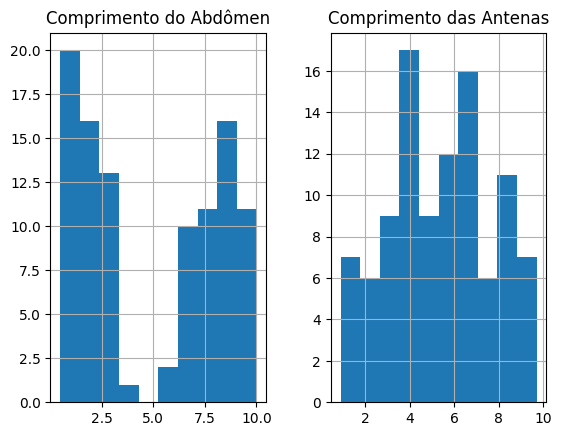

In [61]:
dados.hist()

In [64]:
matrix_correlacao = dados.corr(numeric_only=True)

matrix_correlacao

,Comprimento do Abdômen,Comprimento das Antenas
Comprimento do Abdômen,1.000000,0.740651
Comprimento das Antenas,0.740651,1.000000
